# Secure Data Science with Differential Privacy using Hagrid

### Data Scientist (DS)
- connect to domain node
- access datasets on Domain Node
- aggregate data from multiple sources
- Perform Datascience
- Publish the results

In [2]:
import syft as sy
import numpy as np
# from syft.core.adp.entity import Entity
# if entity is not found -- change the jupyter kernel
# !jupyter kernelspec list

In [3]:
data_scientist_node = sy.login(email="ds@stuba.sk", password="ppdml", port=8081)

Connecting to None... done! 	 Logging into eager_hochreiter... done!


In [4]:
# Increasing privacy budget chunk
# data_scientist_node.privacy_budget
data_scientist_node.request_budget(eps=1000, reason="I want to do data exploration")
# data_scientist_node.privacy_budget

Requested 1000 epsilon of budget. Call .privacy_budget to see if your budget has arrived!


In [5]:
data_scientist_node.datasets

Idx,Name,Description,Assets,Id
[0],COVID19 Cases in 175 countries,Weekly data for an entire year,"[""Country0""] -> Tensor[""Country1""] -> Tensor[""Country2""] -> Tensor...",45f6a0af-0e3b-480d-91ae-d106eedd8eef


In [6]:
covid_ds = data_scientist_node.datasets[0]

In [7]:
result = covid_ds["Country0"]
published_result = result.publish()
final_res = published_result.block_with_timeout(30).get()


In [31]:
type(final_res)

numpy.ndarray

### SMALL EDA

C:\Anaconda3\envs\pysyft_hagrid\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Count'>

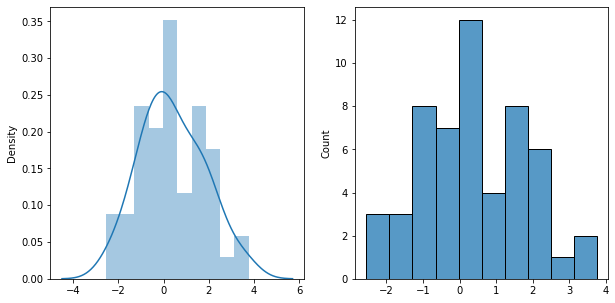

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10, 5,  forward=True)
sns.distplot(final_res, bins=10, ax=axs[0])
sns.histplot(final_res, bins=10, ax=axs[1])

In [19]:
published_data = []

countries_names = list(map(lambda a: f"Country{a}", list(range(5)) + [24, 129]))
## "countries" 24 and 129 had the best / worst rates of infection
for name in countries_names:
    result = covid_ds[name]
    published_result = result.publish(sigma=1)
    published_result.block_with_timeout(30)
    published_data.append(published_result.get())
published_data_np = np.asarray(published_data)
published_data_np = np.rot90(published_data_np)
published_data_np

array([[-1.82054827e-01, -1.85690200e+00,  2.07563118e+00,
         9.08113176e-02,  9.36353839e-01,  4.34294673e-01,
         4.25593890e-01],
       [-8.15735950e-01, -2.07698383e-01,  1.91767323e-01,
        -5.88183310e-01, -2.17805671e-01, -2.79998647e-01,
        -6.26246211e-01],
       [ 1.33509615e+00,  1.42851078e+00,  1.66334895e+00,
         1.64227053e+00,  1.15299390e+00, -1.07302563e-01,
         3.23472265e-01],
       [ 1.60224460e-01, -2.45419597e-01,  1.19995719e+00,
        -2.71767624e-01,  8.56377535e-01, -4.50683696e-02,
        -2.12563201e+00],
       [-1.19161781e+00, -1.33865682e+00, -1.57534509e+00,
         1.70576989e+00,  7.96245331e-01, -8.62358254e-01,
         9.22664707e-01],
       [-2.34842304e-01,  3.01623515e-01,  7.32571590e-01,
        -8.85198137e-01, -1.66291799e-01,  8.92070606e-01,
        -7.59854012e-01],
       [-2.62571189e-01, -9.74541651e-01,  1.91435026e+00,
        -2.62353283e-01, -5.97858272e-02, -7.79422795e-01,
         4.6238787

In [20]:
import pandas as pd

data_df = pd.DataFrame(published_data_np, columns=countries_names)

In [13]:
data_df["Country0"].values

array([ 7.75341381e+00,  2.36284048e+00, -1.37489480e+00,  1.57951732e+00,
       -1.54463185e+01, -9.99841849e+00, -1.02052842e+01, -5.61046299e+00,
        8.67934763e-01, -6.72801560e+00,  5.87162648e+00, -1.59802509e+01,
        1.58940204e+00, -2.01820741e+00,  1.33493417e+01,  3.83299790e+00,
        7.23670038e+00, -7.33320826e+00, -2.40835370e+00,  1.17082007e+01,
       -4.88013807e+00, -1.04214204e+01, -1.43526654e+01,  1.02617135e+00,
       -8.28958646e+00, -1.59628841e+00, -1.35852090e+01,  1.34936930e+01,
        6.23295575e+00,  6.52865782e+00,  9.31871738e+00, -1.01972718e+00,
       -2.14029763e+01, -2.22178823e-02, -1.04837825e+01,  1.18393350e+00,
       -7.88116525e+00,  1.94312708e+00,  7.10974051e+00, -4.51223147e+00,
        2.19155741e+01,  4.23658148e+00,  1.60613559e+01,  1.72014946e+01,
       -3.18711721e+00,  2.11947927e+00,  1.19598790e+01,  2.71271604e+01,
        6.79374478e+00,  3.82955801e+00,  5.35744601e+00, -3.36447640e+00,
        8.68553920e+00, -

C:\Anaconda3\envs\pysyft_hagrid\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\pysyft_hagrid\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\pysyft_hagrid\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

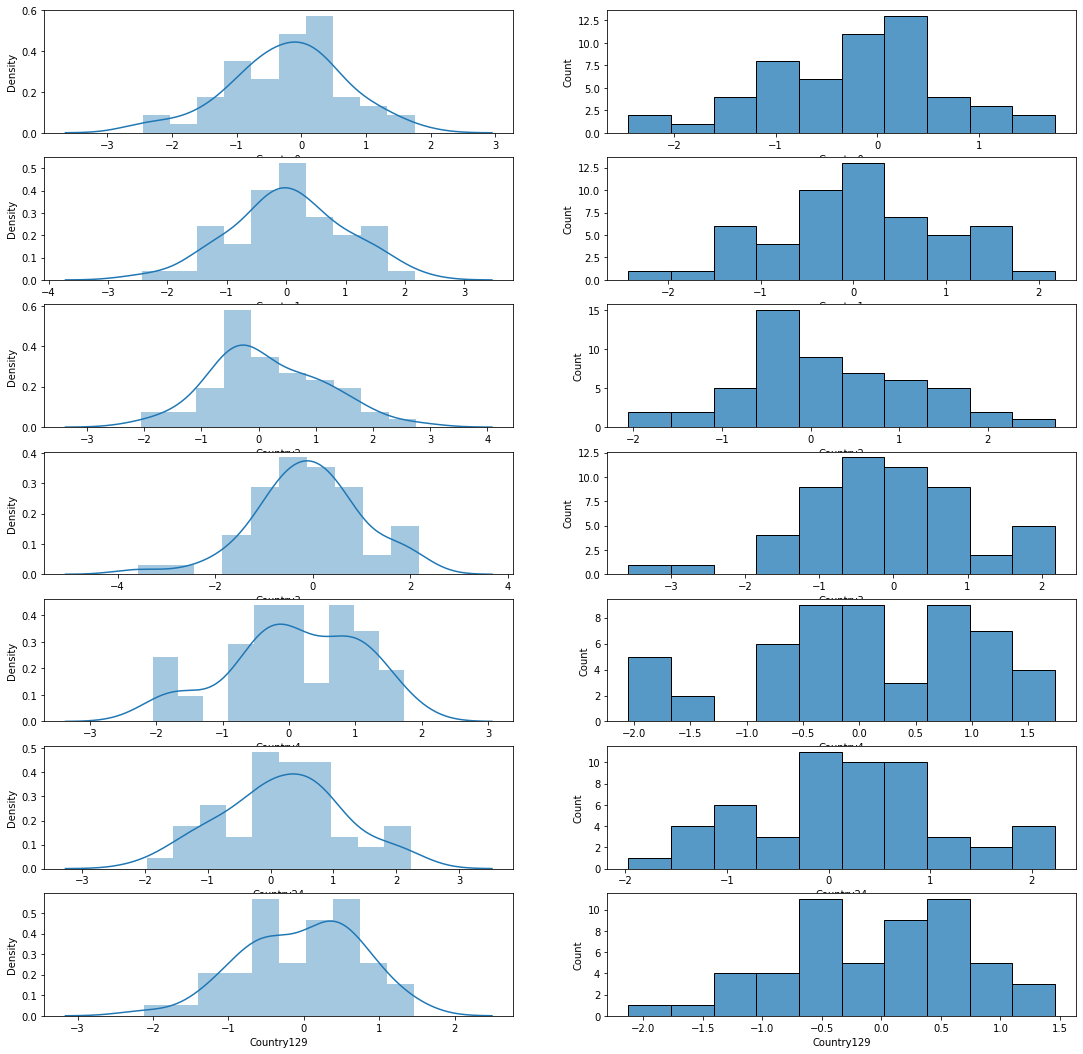

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(nrows=7, ncols=2)
fig.set_size_inches(18.5, 18.5, forward=True)
for local_idx, country_name in enumerate(countries_names):
    sns.distplot(data_df[country_name], bins=10, ax=axs[local_idx][0])
    sns.histplot(data_df[country_name], bins=10, ax=axs[local_idx][1])

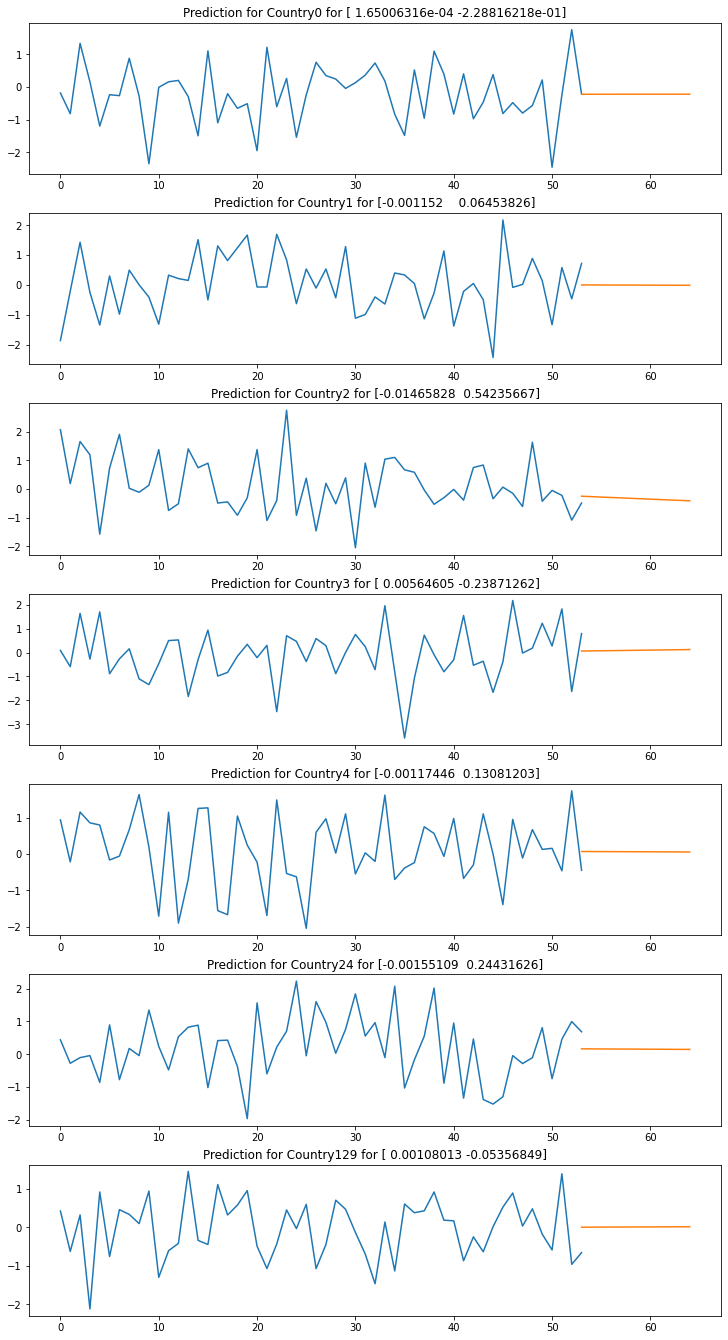

In [22]:
fig, axs = plt.subplots(nrows=7, constrained_layout=True)
fig.set_size_inches(10, 18.5, forward=True)

for local_idx, country_name in enumerate(countries_names):
    x = list(range(54))
    y = data_df[country_name].values
    axs[local_idx].plot(y)

    z = np.polyfit(x, y, 1)
    f = np.poly1d(z)

    new_points = range(12)
    new_y = [f(54+x2) for x2 in new_points]
    axs[local_idx].plot(range(53,65), new_y)
    axs[local_idx].set_title(f"Prediction for {country_name} for {z}")

In [11]:
import matplotlib, matplotlib.pyplot as plt
def plot_extrapolated_country(idx):
    x = list(range(54))
    y = data_df.iloc[idx].values

    plt.plot(y)

    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    new_points = range(12)
    new_y = []
    for x2 in new_points:
        new_y.append(f(54+x2))

    plt.plot(range(53, 65), new_y)

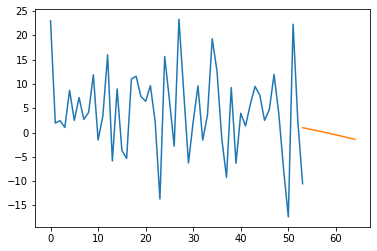

In [12]:
plot_extrapolated_country()